# Support Vector Machine (SVM)

## Introduction
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression challenges. It is widely known for its use in classification problems. The goal of the SVM algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

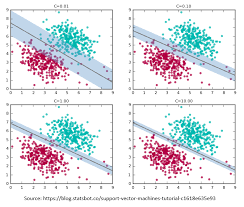

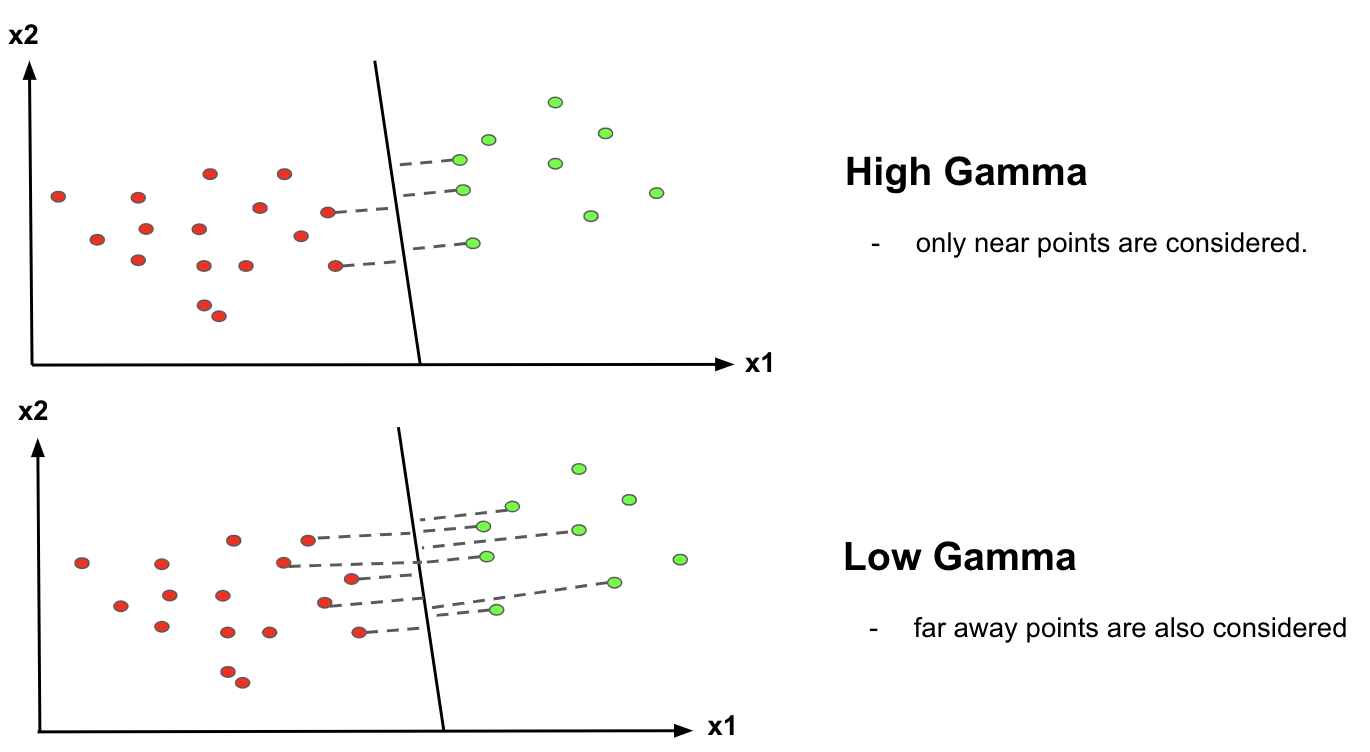

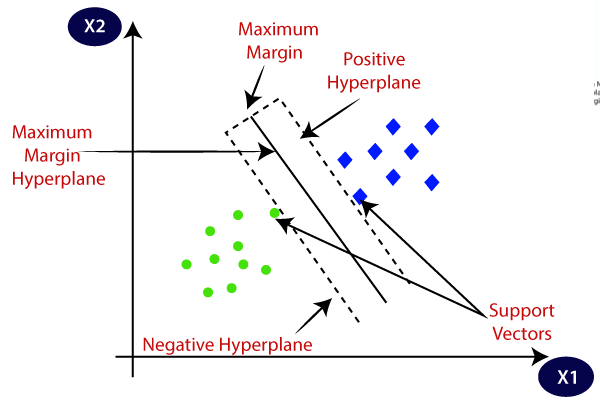

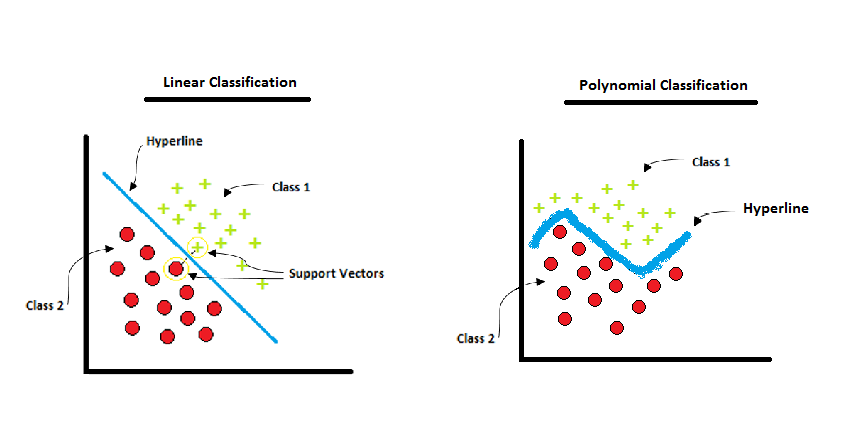

# Mathematical Intuition
SVM tries to find the best line (or hyperplane in higher dimensions) that separates the classes. The distance between the hyperplane and the closest data points from either class is called the margin. SVM aims to maximize this margin.


<!-- ![SVM_margin.png](attachment:SVM_margin.png) -->

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,\
recall_score,precision_score,f1_score,confusion_matrix

from sklearn.datasets import *

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
# Load iris
# Create Dataframe
# Create X and y
# show scatter plot b/w sepal_lt vs sepal_wt
# show scatter plot b/w petal_lt vs petal_wt
# train test split
# call model and fit
# predict y_pred
# model score
# confusion matrix
# classification report
# Save Model

In [15]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [16]:
df['target'] = iris.target

In [17]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

In [21]:
print('Setosa')
df0.sample()

Setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0


In [22]:
print('versicolor')
df1.sample()

versicolor


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
72,6.3,2.5,4.9,1.5,1


In [23]:
print('virginica')
df2.sample()

virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
117,7.7,3.8,6.7,2.2,2


In [24]:
df.shape

(150, 5)

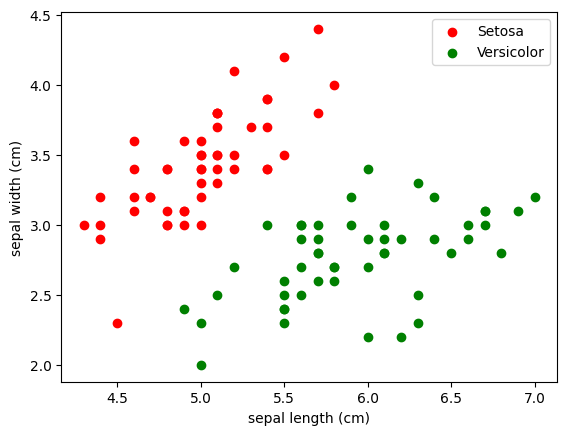

In [25]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='r',label='Setosa')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='g',label = 'Versicolor')
plt.legend()
plt.show()

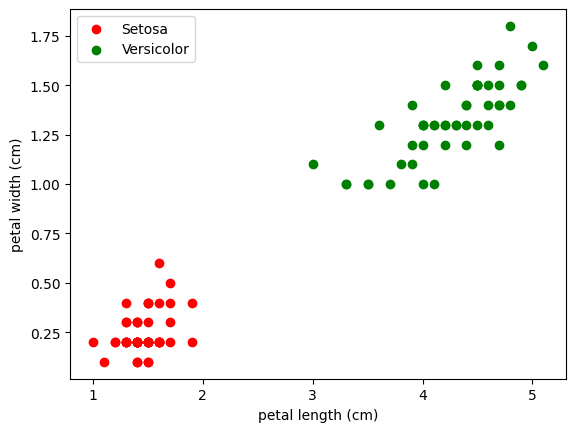

In [26]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='r',label='Setosa')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='g',label = 'Versicolor')
plt.legend()
plt.show()

In [27]:
X = df.iloc[:,:4]
y = df.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
len(X_train)

120

In [30]:
len(X_test)

30

In [31]:
model = SVC()

In [32]:
model.fit(X_train,y_train)

SVC()

In [33]:
model.score(X_test,y_test)

1.0

In [34]:
y_pred = model.predict(X_test)

In [35]:
# y_test == y_pred

In [36]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# How to save model

In [39]:
import pickle


with open('iris_trained_svc.pkl','wb') as f:
    pickle.dump(model,f)
print('Done')

Done


# Conclusion
Support Vector Machine (SVM) is a powerful classification algorithm that is effective in high-dimensional spaces. It is particularly effective in cases where the number of dimensions is greater than the number of samples. However, it can be less effective when the data set has a lot of noise and overlapping classes.